In [56]:
# !pip install seaborn

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set_theme(style="seagreen", palette="pastel")

# 1a versão

In [9]:
projects = ['pso', 'open_mp', 'mpi']
dimensions = [1000, 5000, 10000]

data = {}
for project in projects:
    data[project] = {}
    dfs = []
    for dim in dimensions:
        data_name = f'pso_execution_times_{dim}.csv'
        df = pd.read_csv(f'./{project}/{data_name}')
        df['dimension'] = dim
        dfs.append(df)
    data[project] = pd.concat(dfs, ignore_index=True)

In [11]:
data['pso'].groupby('dimension')['execution_time'].mean()

dimension
1000      0.359667
5000      8.945000
10000    35.749667
Name: execution_time, dtype: float64

In [12]:
data['pso'].groupby('dimension')['execution_time'].std()

dimension
1000     0.013515
5000     0.199512
10000    0.195932
Name: execution_time, dtype: float64

In [13]:
data['open_mp'].groupby('dimension')['execution_time'].mean()

dimension
1000      0.259667
5000      6.023333
10000    24.126667
Name: execution_time, dtype: float64

In [14]:
data['open_mp'].groupby('dimension')['execution_time'].std()

dimension
1000     0.006687
5000     0.053905
10000    0.185293
Name: execution_time, dtype: float64

In [15]:
data['mpi'].groupby('dimension')['execution_time'].mean()

dimension
1000      0.720333
5000      9.127333
10000    34.564000
Name: execution_time, dtype: float64

In [16]:
data['mpi'].groupby('dimension')['execution_time'].std()

dimension
1000     0.025661
5000     0.765889
10000    0.247144
Name: execution_time, dtype: float64

# 2a versão

In [100]:
projects = ['pso', 'open_mp', 'mpi']

data = {}
for project in projects:
    data[project] = {}    
    data_name = f'pso_execution_times.csv'
    df = pd.read_csv(f'./{project}/{data_name}')
    df['execution_time'] = df['execution_time']/1000  # Convert to seconds
    data[project] = df

In [101]:
# data['mpi'].to_csv('mpi_execution_times_01.csv', index=False)
# data['open_mp'].to_csv('open_mp_execution_times_01.csv', index=False)
# data['pso'].to_csv('pso_execution_times_01.csv', index=False)

In [102]:
df_pso = data['pso'].groupby(['dimension', 'n_pop'])['execution_time'].mean().to_frame().reset_index()

In [103]:
df_open = data['open_mp'].groupby(['dimension', 'n_pop', 'n_thread'])['execution_time'].mean().to_frame().reset_index()

In [104]:
df_mpi = data['mpi'].groupby(['dimension', 'n_pop', 'n_proc'])['execution_time'].mean().to_frame().reset_index()

In [105]:
df_open = df_open.merge(df_pso, on=['dimension', 'n_pop'], suffixes=('_open', '_pso'))

In [106]:
df_mpi = df_mpi.merge(df_pso, on=['dimension', 'n_pop'], suffixes=('_mpi', '_pso'))

In [107]:
df_open['speedup'] = df_open['execution_time_pso'] / df_open['execution_time_open']
df_mpi['speedup'] = df_mpi['execution_time_pso'] / df_mpi['execution_time_mpi']

In [108]:
df_open['eficiency'] = df_open['speedup'] / df_open['n_thread'].astype(float)
df_mpi['eficiency'] = df_mpi['speedup'] / df_mpi['n_proc']

In [117]:
df_open[(df_open['n_pop'] == 10) & (df_open['dimension'] == 10000)]

,dimension,n_pop,n_thread,execution_time_open,execution_time_pso,speedup,eficiency
144,10000,10,1,288.1376,0.3633,0.001261,0.001261
145,10000,10,2,144.8678,0.3633,0.002508,0.001254
146,10000,10,3,116.1311,0.3633,0.003128,0.001043
147,10000,10,4,88.2931,0.3633,0.004115,0.001029
148,10000,10,5,60.0294,0.3633,0.006052,0.001210
149,10000,10,6,60.2859,0.3633,0.006026,0.001004
150,10000,10,7,61.8450,0.3633,0.005874,0.000839
151,10000,10,8,61.7317,0.3633,0.005885,0.000736
152,10000,10,9,61.9074,0.3633,0.005868,0.000652
153,10000,10,10,35.6281,0.3633,0.010197,0.001020


In [110]:
df_mpi[(df_mpi['n_pop'] == 500) & (df_mpi['dimension'] == 10000)]

,dimension,n_pop,n_proc,execution_time_mpi,execution_time_pso,speedup,eficiency
90,10000,500,1,17.8155,17.7653,0.997182,0.997182
91,10000,500,2,4.9884,17.7653,3.561322,1.780661
92,10000,500,3,2.4461,17.7653,7.262704,2.420901
93,10000,500,4,1.5489,17.7653,11.469624,2.867406
94,10000,500,5,1.1469,17.7653,15.489842,3.097968
95,10000,500,6,0.8891,17.7653,19.981217,3.330203


## Time comparison

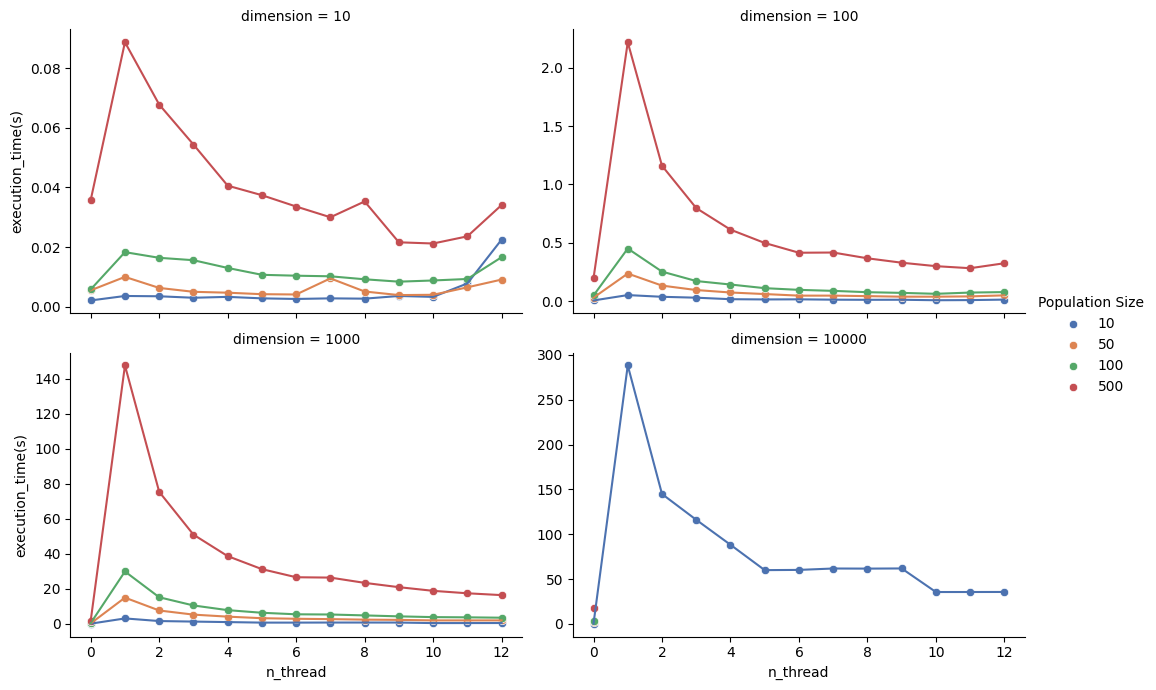

In [111]:
time_pso = df_pso[['dimension', 'n_pop', 'execution_time']]
time_pso['n_thread'] = 0
time_pso = time_pso.rename(columns={'execution_time': 'execution_time(s)'})
open_mp = df_open[['dimension', 'n_pop', 'n_thread','execution_time_open']]
open_mp = open_mp.rename(columns={'execution_time_open': 'execution_time(s)'})


df = pd.concat([time_pso, open_mp], axis=0)

g = sns.FacetGrid(df, col="dimension", hue='n_pop', col_wrap=2, sharey=False, height=3.5, aspect=1.5, palette="deep")
g.map(sns.lineplot, "n_thread", "execution_time(s)")
g.map(sns.scatterplot, "n_thread", "execution_time(s)")
g.add_legend(title="Population Size")
# g.set(yscale='log')
plt.show()

In [112]:
df_open['n_thread'] = df_open['n_thread'].astype(str)

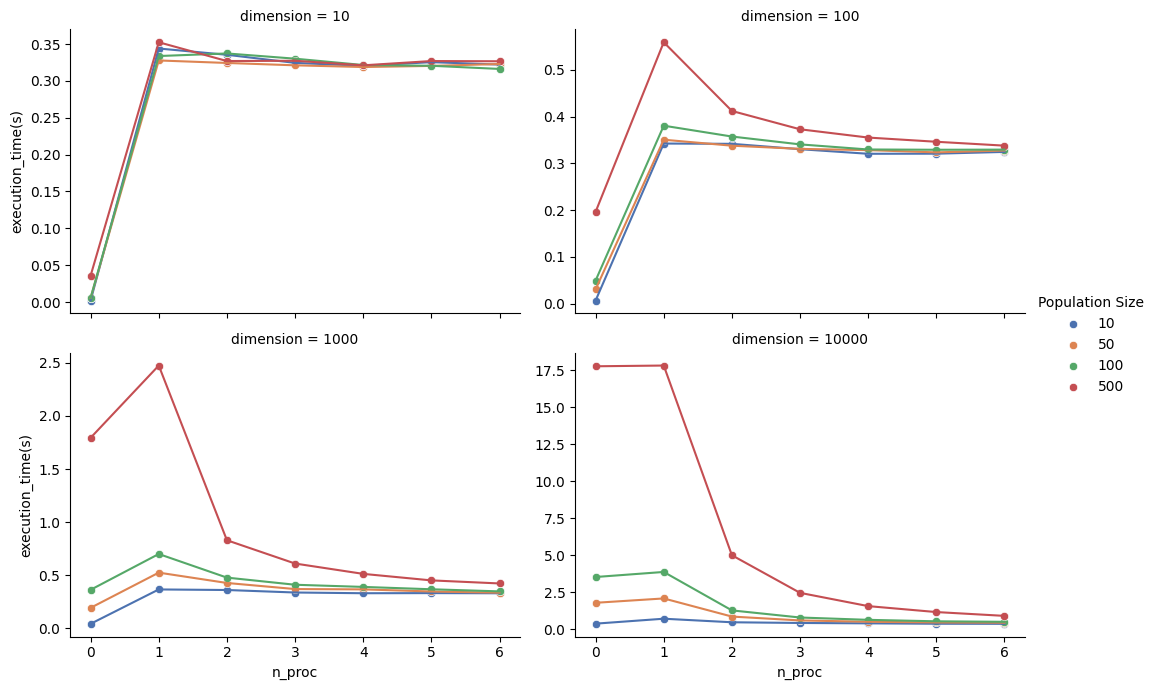

In [113]:
time_pso = df_pso[['dimension', 'n_pop', 'execution_time']]
time_pso['n_proc'] = 0
time_pso = time_pso.rename(columns={'execution_time': 'execution_time(s)'})
time_mpi = df_mpi[['dimension', 'n_pop', 'n_proc','execution_time_mpi']]
time_mpi = time_mpi.rename(columns={'execution_time_mpi': 'execution_time(s)'})


df = pd.concat([time_pso, time_mpi], axis=0)

g = sns.FacetGrid(df, col="dimension", hue='n_pop', col_wrap=2, sharey=False, height=3.5, aspect=1.5, palette="deep")
g.map(sns.lineplot, "n_proc", 'execution_time(s)')
g.map(sns.scatterplot, "n_proc", 'execution_time(s)')
g.add_legend(title="Population Size")

## SpeedUp

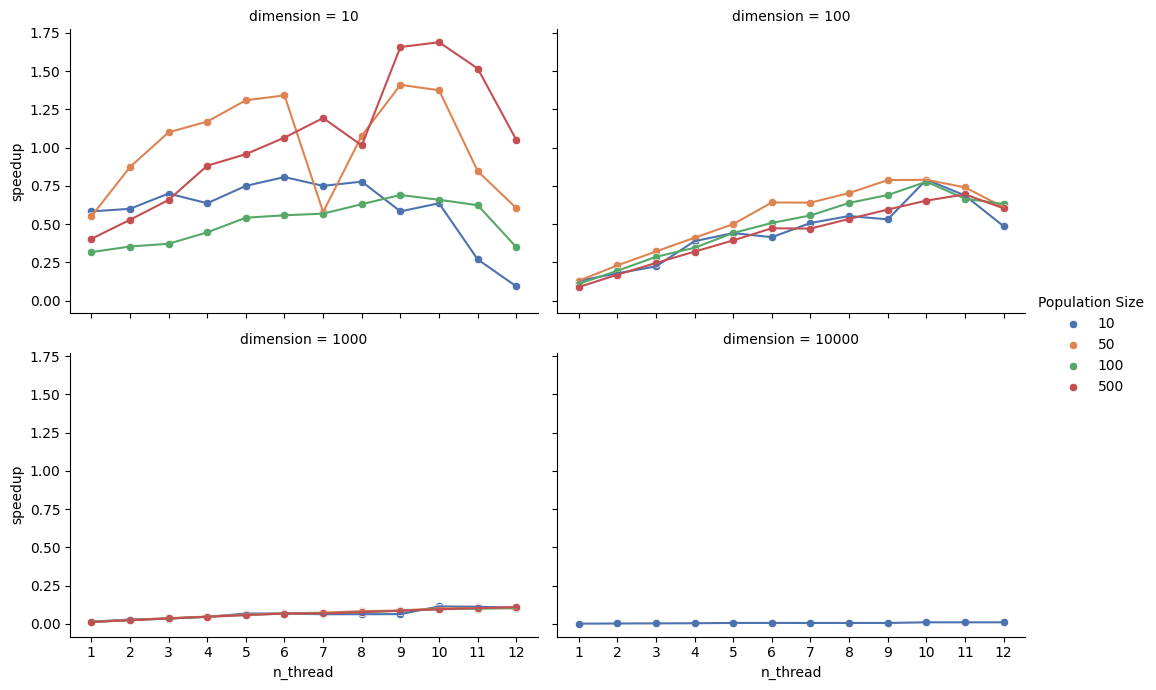

In [118]:
g = sns.FacetGrid(df_open, col="dimension", hue="n_pop", col_wrap=2, sharey=True, height=3.5, aspect=1.5, palette="deep")
g.map(sns.lineplot, "n_thread", "speedup")
g.map(sns.scatterplot, "n_thread", "speedup")
g.add_legend(title="Population Size")

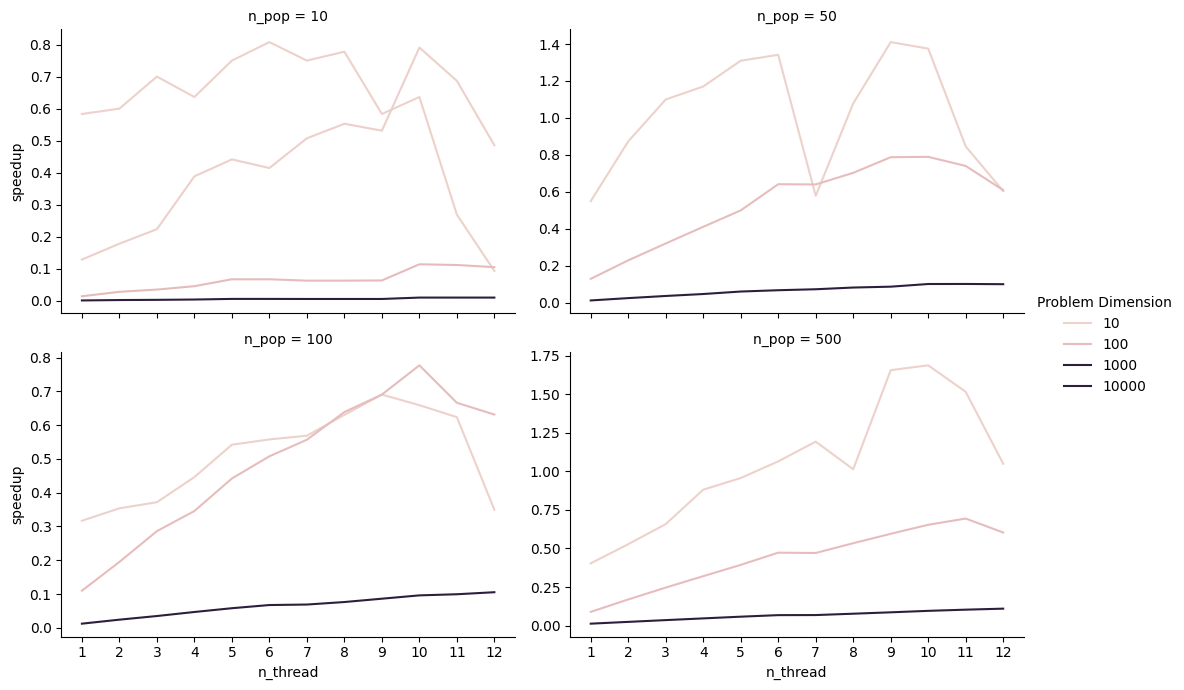

In [115]:
g = sns.FacetGrid(df_open, col="n_pop", col_wrap=2, sharey=False, height=3.5, aspect=1.5)
g.map(sns.lineplot, "n_thread", "speedup", "dimension")
g.add_legend(title="Problem Dimension")

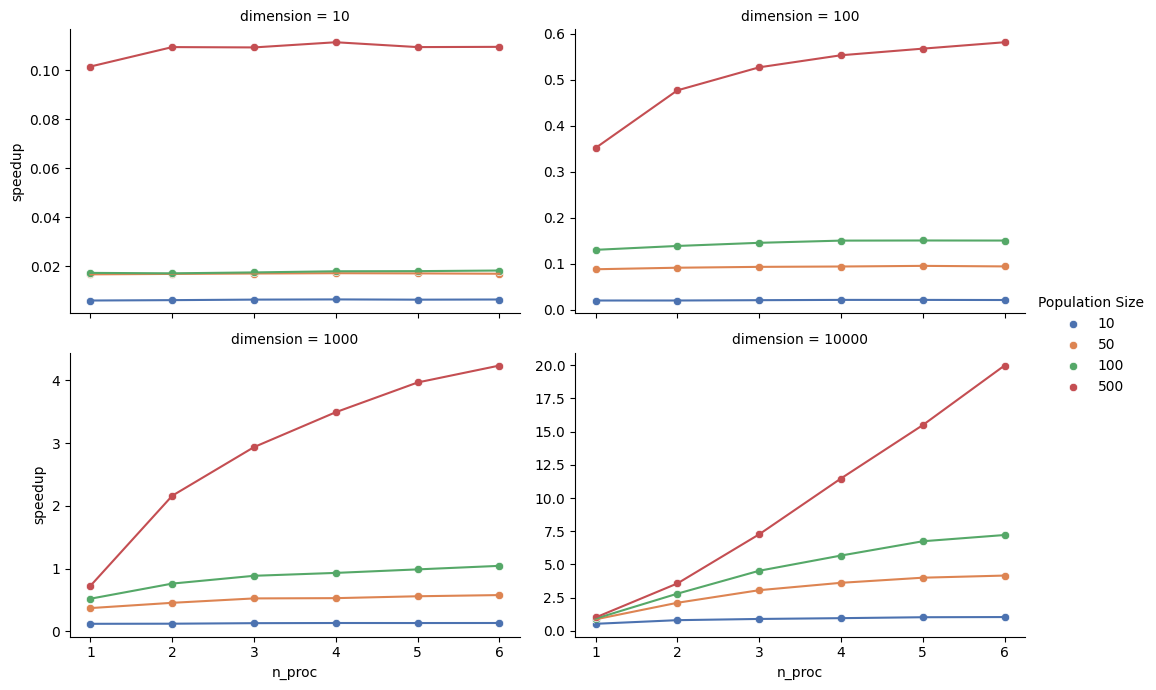

In [119]:
g = sns.FacetGrid(df_mpi, col="dimension", hue="n_pop", col_wrap=2, sharey=False, height=3.5, aspect=1.5, palette="deep")
g.map(sns.lineplot, "n_proc", "speedup")
g.map(sns.scatterplot, "n_proc", "speedup")
g.add_legend(title="Population Size")

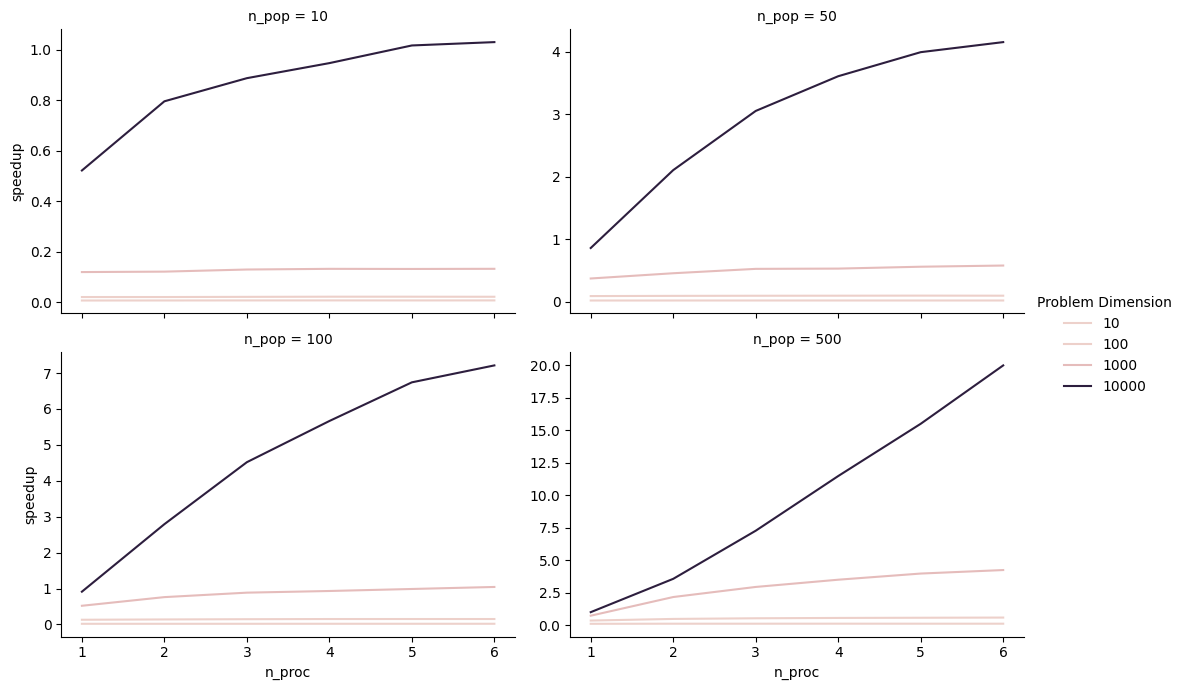

In [120]:
g = sns.FacetGrid(df_mpi, col="n_pop", col_wrap=2, sharey=False, height=3.5, aspect=1.5)
g.map(sns.lineplot, "n_proc", "speedup", "dimension")
g.add_legend(title="Problem Dimension")

## Eficiency

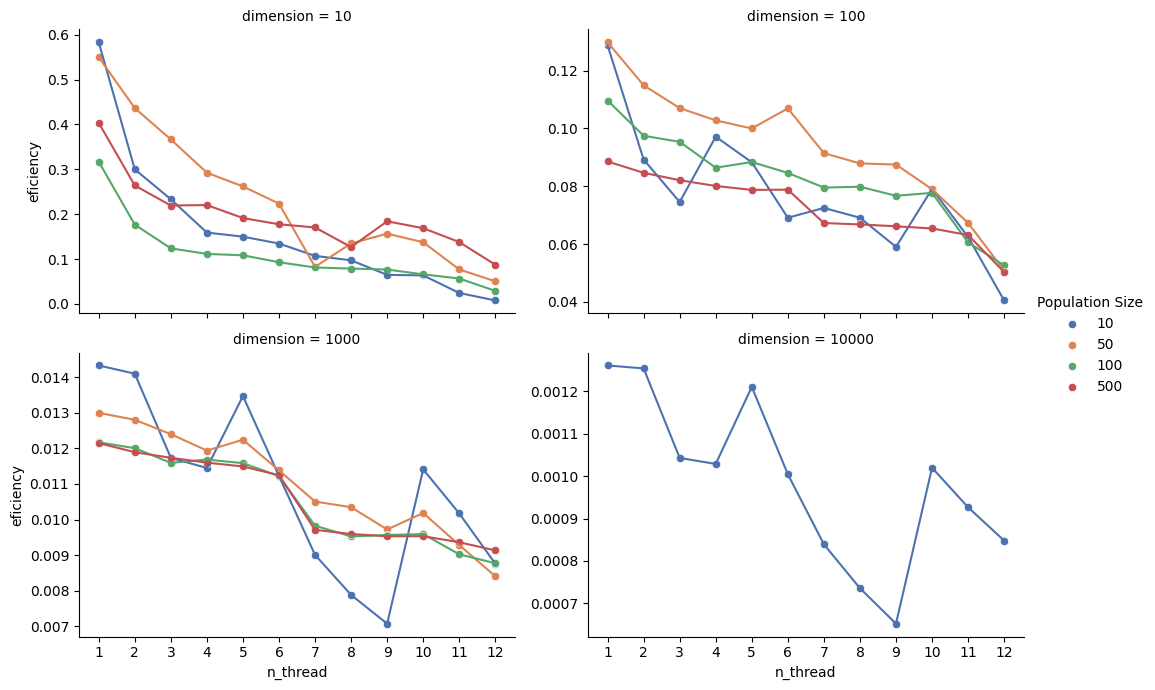

In [121]:
g = sns.FacetGrid(df_open, col="dimension", hue="n_pop", palette="deep", col_wrap=2, sharey=False, height=3.5, aspect=1.5)
g.map(sns.lineplot, "n_thread", "eficiency")
g.map(sns.scatterplot, "n_thread", "eficiency")
g.add_legend(title="Population Size")

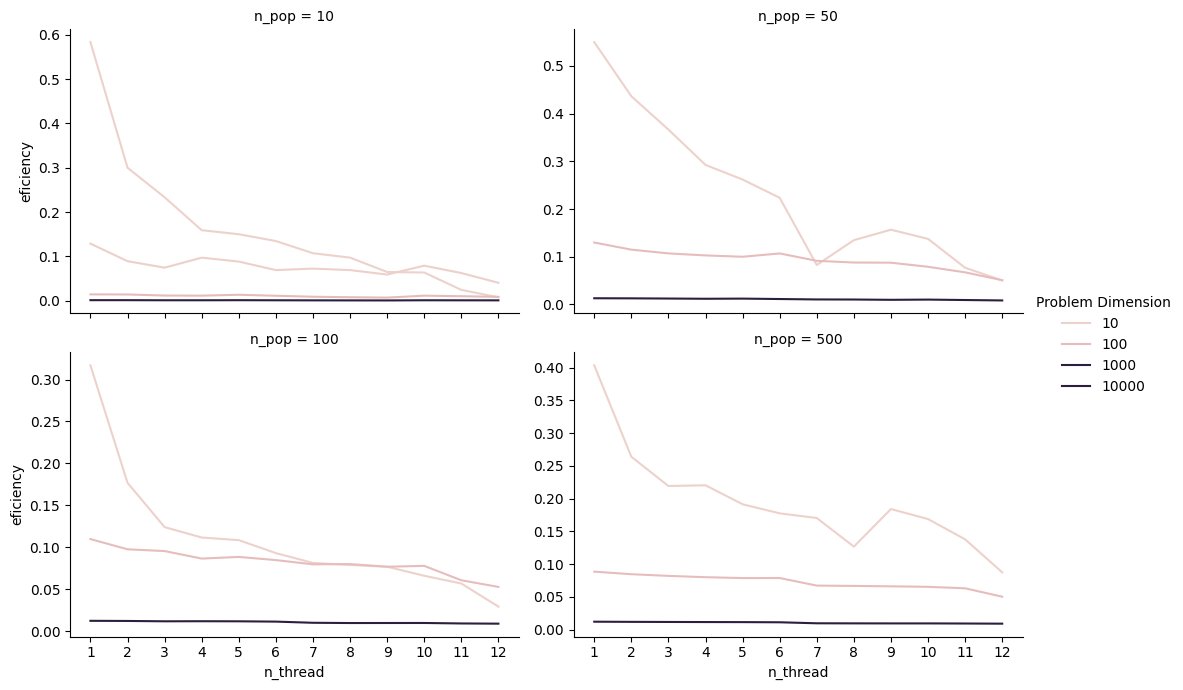

In [122]:
g = sns.FacetGrid(df_open, col="n_pop", col_wrap=2, sharey=False, height=3.5, aspect=1.5)
g.map(sns.lineplot, "n_thread", "eficiency", "dimension")
g.add_legend(title="Problem Dimension")

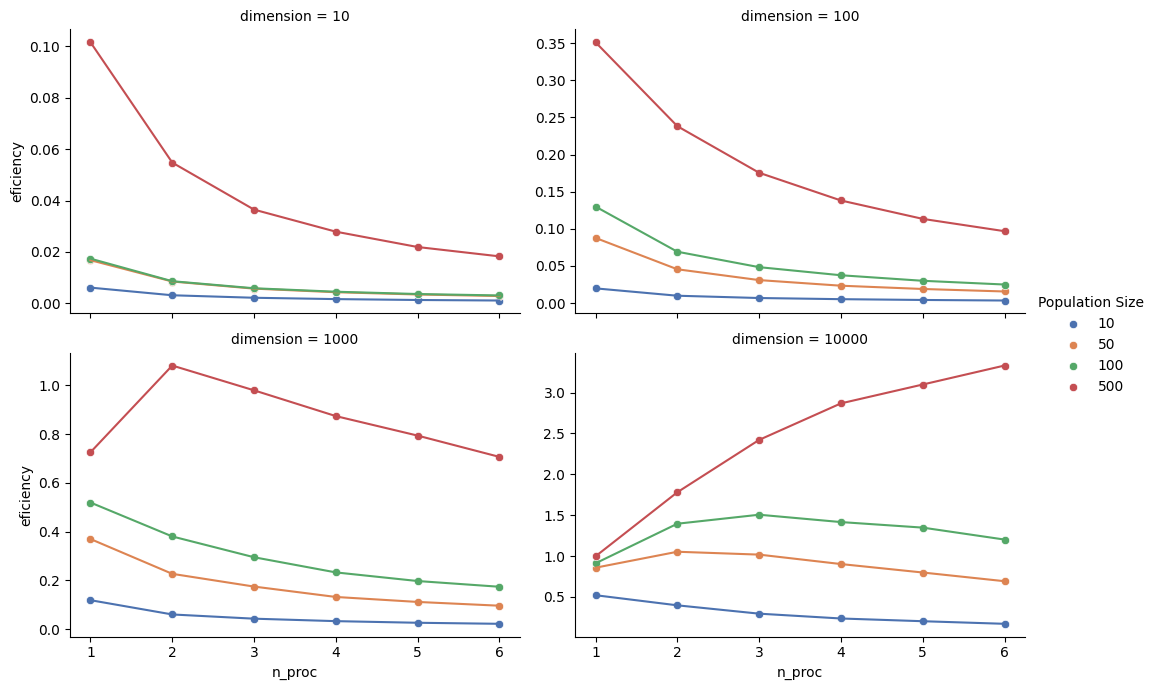

In [123]:
g = sns.FacetGrid(df_mpi, col="dimension", hue="n_pop", palette="deep", col_wrap=2, sharey=False, height=3.5, aspect=1.5)
g.map(sns.lineplot, "n_proc", "eficiency")
g.map(sns.scatterplot, "n_proc", "eficiency")
g.add_legend(title="Population Size")

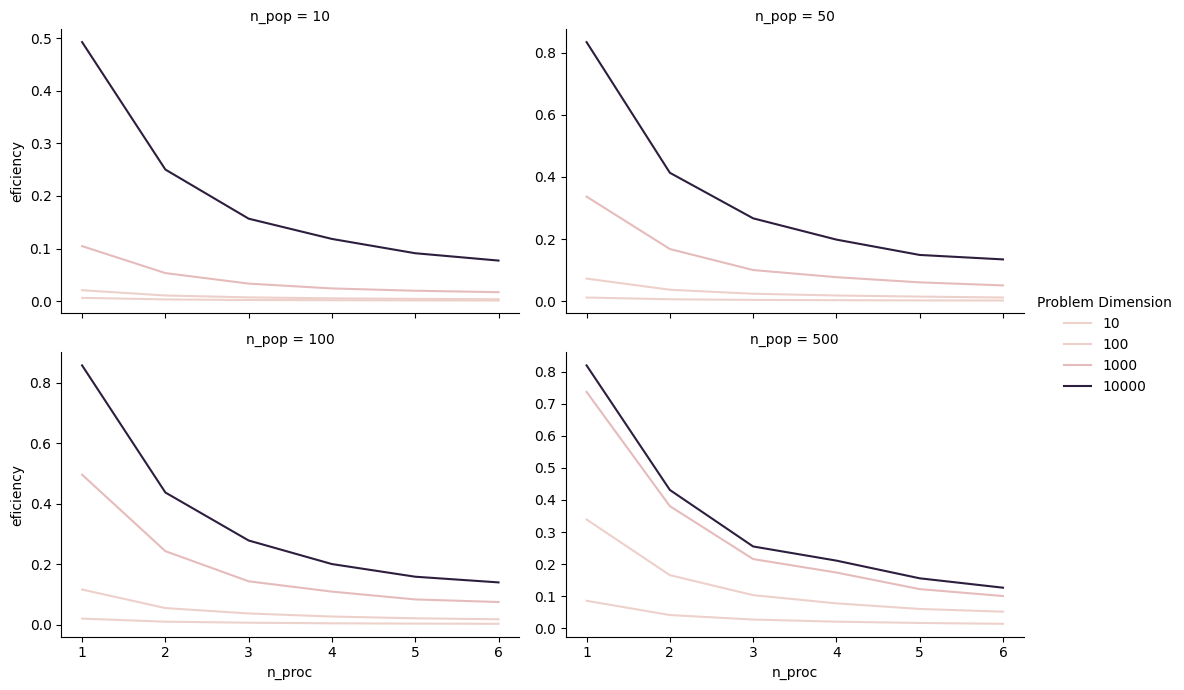

In [23]:
g = sns.FacetGrid(df_mpi, col="n_pop", col_wrap=2, sharey=False, height=3.5, aspect=1.5)
g.map(sns.lineplot, "n_proc", "eficiency", "dimension")
g.add_legend(title="Problem Dimension")